<a href="https://colab.research.google.com/github/dcshapiro/AI-Feynman/blob/master/AI_Feynman_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Feynman 2.0: Learning Regression Equations From Data

### Clone repository and install dependencies

In [3]:
!git clone https://github.com/SJ001/AI-Feynman.git
!cd /content/AI-Feynman && git reset --hard 28edde1a36a166a081de84999ab4fd40071957db

Cloning into 'AI-Feynman'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 393 (delta 42), reused 0 (delta 0), pack-reused 322
Receiving objects: 100% (393/393), 31.29 MiB | 9.60 MiB/s, done.
Resolving deltas: 100% (234/234), done.


Look at what we downloaded

In [4]:
!ls /content/AI-Feynman
# %pycat AI-Feynman/requirements.txt if you need to fix the dependencies

Code  example_data  LICENSE  README.md	requirements.txt


Fix broken requirements file (may not be needed if later versions fix this).

In [5]:
%%writefile AI-Feynman/requirements.txt
torch>=1.4.0
matplotlib
sympy==1.4
pandas
scipy
sortedcontainers

Overwriting AI-Feynman/requirements.txt


Install dependencies not already installed in Google Collab

In [6]:
!pip install -r AI-Feynman/requirements.txt

     |████████████████████████████████| 5.3MB 2.8MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


Check that fortran is installed

In [7]:
!gfortran --version

GNU Fortran (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Check the OS version

In [8]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.3 LTS
Release:	18.04
Codename:	bionic


Install the csh shell

In [9]:
!sudo apt-get install csh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  csh
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 243 kB of archives.
After this operation, 358 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 csh amd64 20110502-3ubuntu0.18.04.1 [243 kB]
Fetched 243 kB in 2s (144 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

Set loose permissions to avoid some reported file permissions issues

In [10]:
!chmod +777 /content/AI-Feynman/Code/*

### Compile the fortran code

Look at the code directory

In [11]:
!ls -l /content/AI-Feynman/Code

total 1236
-rwxrwxrwx 1 root root     11 Jul  1 15:44 10ops.txt
-rwxrwxrwx 1 root root     15 Jul  1 15:44 14ops.txt
-rwxrwxrwx 1 root root     19 Jul  1 15:44 19ops.txt
-rwxrwxrwx 1 root root      8 Jul  1 15:44 7ops.txt
-rwxrwxrwx 1 root root    138 Jul  1 15:44 ai_feynman_example.py
-rwxrwxrwx 1 root root   1287 Jul  1 15:44 ai_feynman_terminal_example.py
-rwxrwxrwx 1 root root 960508 Jul  1 15:44 arity2templates.txt
-rwxrwxrwx 1 root root    653 Jul  1 15:44 brute_force_oneFile_mdl_v2.scr
-rwxrwxrwx 1 root root    654 Jul  1 15:44 brute_force_oneFile_mdl_v3.scr
-rwxrwxrwx 1 root root    541 Jul  1 15:44 brute_force_oneFile_v1.scr
-rwxrwxrwx 1 root root    608 Jul  1 15:44 brute_force_oneFile_v2.scr
-rwxrwxrwx 1 root root    609 Jul  1 15:44 brute_force_oneFile_v3.scr
-rwxrwxrwx 1 root root    616 Jul  1 15:44 compile.sh
-rwxrwxrwx 1 root root   4444 Jul  1 15:44 dimensionalAnalysis.py
-rwxrwxrwx 1 root root   6168 Jul  1 15:44 get_pareto.py
-rwxrwxrwx 1 root root   1745 Jul  1 15:4

Compile .f files into .x files

In [12]:
!cd /content/AI-Feynman/Code/ && ./compile.sh

### Run the first example from the AI-Feynman repository

Change working directory to the Code directory

In [13]:
import os
os.chdir("/content/AI-Feynman/Code/")
print(os.getcwd())

/content/AI-Feynman/Code


In [14]:
!pwd

/content/AI-Feynman/Code


Check that the bruteforce code runs without errors

In [ ]:
from S_brute_force import brute_force
brute_force("/content/AI-Feynman/example_data/","example1.txt",30,"14ops.txt")

1

Look at the first line of the example 1 file

In [ ]:
!head -n 1 /content/AI-Feynman/example_data/example1.txt

1.6821347439986711 1.1786188905177983 4.749225735259924 1.3238356535004034 3.462199507094163 


In [ ]:
# Example 1 has data generated from an equation, where the last column is the regression target, and the rest of the columns are the input data
# The following example shows the relationship between the first line of the file example1.txt and the formula used to make the data
x=[1.6821347439986711,1.1786188905177983,4.749225735259924,1.3238356535004034,3.462199507094163]
x0,x1,x2,x3=x[0],x[1],x[2],x[3]
(x0**2 - 2*x0*x1 + x1**2 + x2**2 - 2*x2*x3 + x3**2)**0.5

3.4621995070941636

Run the code. It takes a long time, so go get some coffee.

In [16]:
from S_run_aifeynman import run_aifeynman
# Run example 1 as the regression dataset
run_aifeynman("/content/AI-Feynman/example_data/","example1.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=400)

Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[0.0, 30.834454019627422, '0']
[36.83243537730492, 29.126340100893046, cos(x0) + cos(x2 + x3) + 2.333740234375]
[55.42220420859321, 29.090770779525364, cos(x2 + x3) + 1.88584470748901]
[63.97127597744305, 28.649814958454094, '1.808310192134*(cos(((x3-x2)/pi)))**(-1)']
[73.2730466728654, 26.75402411317423, '0.2*x0**2 - 0.444444444444444*x0*x1 + 0.111111111111111*x0 + 0.2*x1**2 + 0.125*x1 + 0.2*x2**2 - 0.444444444444444*x2*x3 + 0.166666666666667*x2 + 0.2*x3**2 + 0.166666666666667*x3 + 0.2']
Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[0.0, 30.834454019627422, '0']
[36.83243537730492, 29.126340100893046, cos(x0) + cos(x2 + x3) + 2.333740234375]
[46.5605178945111, 27.13368508267342, 1.03779721260071]
[46.56057652773589, 27.133420617255663, 1.03783939104594]
[48.69845503685542, 26.87717556384026, 'tan(0.285480024878*pi)']
[63

### Assess the results

In [17]:
!cat results.dat 

      0.500000000000                      0               1             0.5000            25.5754            48.8289            48.8289
      0.456786085514                    P~E              72             0.4568            31.6149            54.8684            54.8684
      0.072364956838                    PRL              90             0.0724            29.2787            52.5322            52.5322
      0.068651279201                   PPJ/             126             0.0687            29.6881            52.9416            52.9416
      0.000000000000                   PPO/             130             0.0000             7.0224             7.0224             7.0224


We found a candidate with an excellent fit, let's see what we got

In [18]:
!ls -l /content/AI-Feynman/Code/results/

total 68
drwxr-xr-x 2 root root 4096 Jul  1 12:54 mystery_world_acos
drwxr-xr-x 2 root root 4096 Jul  1 12:54 mystery_world_asin
drwxr-xr-x 2 root root 4096 Jul  1 12:54 mystery_world_atan
drwxr-xr-x 2 root root 4096 Jul  1 12:56 mystery_world_cos
drwxr-xr-x 2 root root 4096 Jul  1 12:57 mystery_world_exp
drwxr-xr-x 2 root root 4096 Jul  1 12:59 mystery_world_inverse
drwxr-xr-x 2 root root 4096 Jul  1 13:00 mystery_world_log
drwxr-xr-x 2 root root 4096 Jul  1 13:01 mystery_world_sin
drwxr-xr-x 2 root root 4096 Jul  1 13:03 mystery_world_sqrt
drwxr-xr-x 2 root root 4096 Jul  1 13:04 mystery_world_squared
drwxr-xr-x 2 root root 4096 Jul  1 13:05 mystery_world_tan
drwxr-xr-x 3 root root 4096 Jul  1 12:06 NN_trained_models
-rw-r--r-- 1 root root  183 Jul  1 13:07 solution_before_snap_example1.txt.txt
-rw-r--r-- 1 root root  415 Jul  1 13:08 solution_example1.txt
-rw-r--r-- 1 root root  183 Jul  1 13:07 solution_first_snap_example1.txt.txt
drwxr-xr-x 2 root root 4096 Jul  1 12:35 translated

In [19]:
!ls -l /content/AI-Feynman/Code/results/NN_trained_models/models

total 768
-rw-r--r-- 1 root root 128700 Jul  1 12:12 example1.txt_train.h5
-rw-r--r-- 1 root root 128212 Jul  1 12:34 example1.txt_train-translated_minus.h5
-rw-r--r-- 1 root root 128210 Jul  1 12:13 example1.txt_train-translated_minus_pretrained.h5
-rw-r--r-- 1 root root 127706 Jul  1 12:52 example1.txt_train-translated_minus-translated_minus.h5
-rw-r--r-- 1 root root 127706 Jul  1 12:35 example1.txt_train-translated_minus-translated_minus_pretrained.h5
-rw-r--r-- 1 root root 127197 Jul  1 12:53 example1.txt_train-translated_minus-translated_minus-translated_multiply_pretrained.h5


In [20]:
!cat /content/AI-Feynman/Code/results/solution_example1.txt

30.834454019627422 4.946471395876568 593576.5675051882 0.0 30.834454019627422 0
29.661717905473825 4.890530251072885 586863.6301287463 1.0 29.661717905473818 1
29.304496932666552 4.873050165836775 584766.019900413 3.0 29.304496932666545 3/2
29.661648890190328 4.820780475275042 578493.657033005 4.0 28.26178092441696 exp(-23.140666108580+exp(pi))
0.0 -inf -inf 13.169925001442312 0.0 ((x0-x1)**2 + (x2-x3)**2)**0.5


Note in the cell above that the solution with the lowest error is the formula this data was generated from

### Try our own dataset generation and equation learning

The code below generates our regression example dataset

We generate points for 4 columns, where x0 is from the same equation as x1, and x2 is from the same equation as x3
The last column is Y

In [ ]:
import os
import random

os.chdir("/content/AI-Feynman/example_data")

def getY(x01,x23):
  y = -0.5*x01+0.5*x23+3
  return y

def getRow():
  [x0,x2]=[random.random() for x in range(2)]
  x1=x0
  x3=x2
  y=getY(x1,x3)
  return str(x0)+" "+str(x1)+" "+str(x2)+" "+str(x3)+" "+str(y)+"\n"

with open("duplicateVarsExample.txt", "w") as f:
  for _ in range(10000):
    f.write(getRow())
f.close()

# switch back to the code directory
os.chdir("/content/AI-Feynman/Code")

Let's look at our data

In [ ]:
!head -n 10 ../example_data/duplicateVarsExample.txt

0.7495052892308969 0.7495052892308969 0.9594182437162296 0.9594182437162296 3.1049564772426663
0.36622440212103946 0.36622440212103946 0.1511339510041746 0.1511339510041746 2.8924547744415676
0.9940075877262533 0.9940075877262533 0.948080381649933 0.948080381649933 2.97703639696184
0.15833377965332895 0.15833377965332895 0.6359208795892615 0.6359208795892615 3.238793549967966
0.4614747052517377 0.4614747052517377 0.19959176451350058 0.19959176451350058 2.8690585296308813
0.6087177963452982 0.6087177963452982 0.37893680035566024 0.37893680035566024 2.885109502005181
0.06422319087211326 0.06422319087211326 0.236989406602108 0.236989406602108 3.0863831078649975
0.7120151446988243 0.7120151446988243 0.8245541494277909 0.8245541494277909 3.0562695023644832
0.855838372500714 0.855838372500714 0.5775941033010379 0.5775941033010379 2.860877865400162
0.4973823547233599 0.4973823547233599 0.13300958934450435 0.13300958934450435 2.817813617310572
0.01921955820385357 0.01921955820385357 0.45469808

Let's also plot the data for x01 and x23 against Y

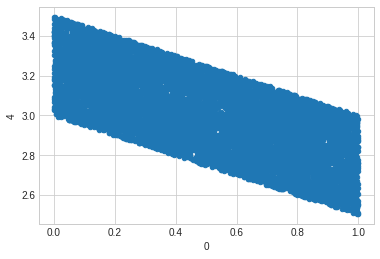

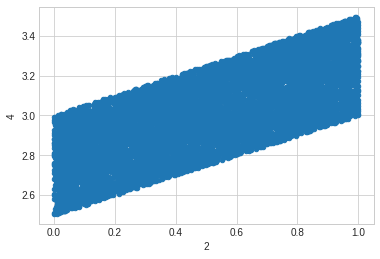

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

df=pd.read_csv("../example_data/duplicateVarsExample.txt",sep=" ",header=None)
df.plot.scatter(x=0, y=4)
df.plot.scatter(x=2, y=4)

Now we run the experiment, and go get more coffee, because this is not going to be fast...

In [ ]:
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/AI-Feynman/example_data/","duplicateVarsExample.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=400)

Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[9.754887502163468, 26.83518071960566, '3 - 0.25*x1']
[26.509775004326936, 26.553353510375235, '-0.25*x0 - 0.25*x1 + 0.25*x3 + 3']
[29.0, 6.782994132837479e-08, '3.000000000000+log(sqrt(exp((x2-x0))))']
[33.65148445440323, 4.815513076050948e-09, '-0.25*x0 - 0.25*x1 + 0.25*x2 + 0.25*x3 + 3.0']
Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[9.754887502163468, 26.83518071960566, '3 - 0.25*x1']
[23.838459164932694, 26.77511017635963, '-tan(0.02*x1 - 1.25)']
[26.509775004326936, 26.553353510375235, '-0.25*x0 - 0.25*x1 + 0.25*x3 + 3']
[29.0, 6.782994132837479e-08, '3.000000000000+log(sqrt(exp((x2-x0))))']
[33.65148445440323, 4.815513076050948e-09, '-0.25*x0 - 0.25*x1 + 0.25*x2 + 0.25*x3 + 3.0']
Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[2.0, 27.138283121949375, '3.1

Initial models quickly mapped to x0 and x2 (the system realized x1 and x3 are duplicates and so not needed)

Later on the system found 3.000000000000+log(sqrt(exp((x2-x1)))) which is a bit crazy but looks like a plane

We can see on Wolfram alpha that an equivalent form of this equation is:

(x2 - x1)/2 + 3.000000000000 

which is what we used to generate the dataset!

Link: https://www.wolframalpha.com/input/?i=3.000000000000%2Blog%28sqrt%28exp%28%28x2-x1%29%29%29%29

In [ ]:
!ls -l /content/AI-Feynman/Code/results/

In [ ]:
!cat /content/AI-Feynman/Code/results/solution_duplicateVarsExample.txt

31.582960727362288 4.828684345339221 48286.84345339221 0.0 28.417039276692527 8.91505505199440e-11
26.820678161409102 4.745273811165266 47452.73811165266 2.0 26.820678161409102 (3.0)+(tan(0.0))
26.803754374446132 4.744363186542102 47443.63186542102 7.0 26.803754374446132 (3.0)+(0.25*x3)
26.802949181437423 4.744319846889273 47443.19846889273 9.754887502163468 26.802949181437423 (3.0)+(atan(0.25*x3))
26.745817145351275 4.741241376849119 47412.413768491184 12.0 26.745817145351275 x3*log(log(pi)) + 3.0
26.744333346047053 4.7411613370706265 47411.61337070626 13.0 26.744333346047053 log(x3*log(log(pi)) + 1) + 3.0
26.59733166596453 4.7332096118402935 47332.09611840294 18.253496664211536 26.59733166596453 (acos(0.04*x0*x1 - 1))+(tan(0.0))
25.885882206233276 4.694093581827537 46940.93581827537 21.22881869049588 25.885882206233276 (3*exp(-0.08*x1))+(0.25*x3)
3.267669587320286e-08 -24.867162647351474 -248671.62647351474 24.651484454403228 3.267669587320286e-08 0.5*log(exp(-x0 + x2)) + 3
4.8155130

The solver settled on *log(sqrt(exp(-x1 + x3))) + 3.0* which we know is correct

Now, that was a bit of a softball problem as it has an exact solution. Let's now add noise to the dataset and see how the library holds up

### Let's add small amount of noise to every variabe and see the fit quality

We do the same thing as before, but now we add or subtract noise to x0,x1,x2,x3 after generating y

In [16]:
import os
import random
import numpy as np

os.chdir("/content/AI-Feynman/example_data")

def getY(x01,x23):
  y = -0.5*x01+0.5*x23+3
  return y

def getRow():
  x=[random.random() for x in range(4)]
  x[1]=x[0]
  x[3]=x[2]
  y=getY(x[1],x[3])
  mu=0
  sigma=0.05
  noise=np.random.normal(mu, sigma, 4)
  x=x+noise
  return str(x[0])+" "+str(x[1])+" "+str(x[2])+" "+str(x[3])+" "+str(y)+"\n"

with open("duplicateVarsWithNoise100k.txt", "w") as f:
  for _ in range(100000):
    f.write(getRow())
f.close()

# switch back to the code directory
os.chdir("/content/AI-Feynman/Code")

Let's have a look at the data

In [17]:
!head -n 20 ../example_data/duplicateVarsWithNoise100k.txt

0.15289264209469416 0.2829966068992473 0.6104708312181512 0.6043475260663228 3.1975315738942793
0.889285380442479 0.9334684862177808 0.7503770699358906 0.6608418489900274 2.9144971423535893
0.2755136981909549 0.23872363192436755 0.12637188597533267 0.08056372950063607 2.9518503868124246
0.1746018418681348 0.12293457415378542 0.730846042126973 0.7463969158741828 3.274905931620777
0.5491081265500859 0.5925961897911269 0.5997213933783978 0.5691240548756916 3.009675563632133
0.6541729091302784 0.5836870480773635 0.7569529739603265 0.7674199995325519 3.0879595773602
0.6946624498902666 0.7118597307891784 1.0358559774610916 1.0531623867719622 3.1207790611578794
-0.07267132738470411 -0.041052948940529854 0.7707588567223276 0.7377414287774727 3.386093829729029
0.31596844939707514 0.3051532368104879 0.6287666259268113 0.6019744696452333 3.1619212177846743
0.14376489597328382 0.18788171663748351 0.2846780763048972 0.15587657746217742 3.0821567923558666
0.3070047932793547 0.38652507330989566 0.827

Now let's plot the data

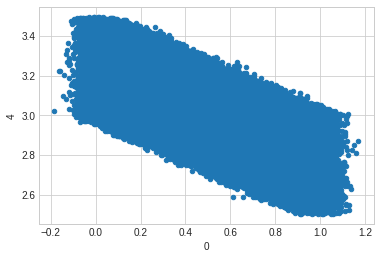

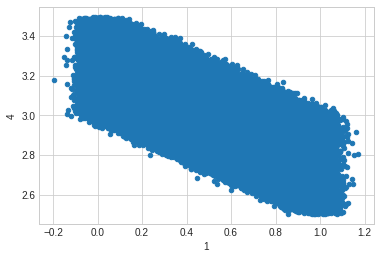

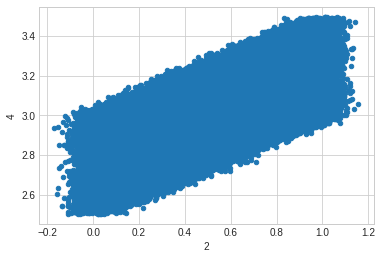

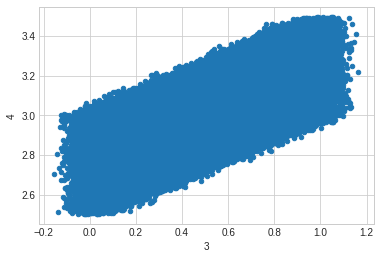

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

df=pd.read_csv("../example_data/duplicateVarsWithNoise100k.txt",sep=" ",header=None)
df.plot.scatter(x=0, y=4)
df.plot.scatter(x=1, y=4)
df.plot.scatter(x=2, y=4)
df.plot.scatter(x=3, y=4)

In [19]:
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/AI-Feynman/example_data/","duplicateVarsWithNoise100k.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=600)

Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[14.298543993057573, 31.581628067077556, -2.01507231217991e-10]
[33.65148445440323, 23.756310705463807, '-0.25*x0 - 0.25*x1 + 0.25*x2 + 0.25*x3 + 3']
Checking for brute force + 

Checking for brute force * 

Checking polyfit 

Complexity  RMSE  Expression
[14.298543993057573, 31.581628067077556, -2.01507231217991e-10]
[33.65148445440323, 23.756310705463807, '-0.25*x0 - 0.25*x1 + 0.25*x2 + 0.25*x3 + 3']
[46.8263695199547, 23.52960359812308, 1.24779089858445]
[46.82645046311327, 23.52838791838819, 1.24786090850830]
[95.73080411689963, 23.327546464035166, tan(0.0291788969188929*x2 + 0.88010545566829)]
[96.45077266713301, 23.245315586041865, tan(0.0187515188008547*x2 - 2.25579309421493)]
[114.00400153885663, 23.118715196684242, tan(x3*exp(-2.8512812870763*exp(x1)) + 0.886947154998779)]
[142.49654530491821, 23.079708409481626, tan(-0.00579398358240724*x0 + 0.0330431312322617*x3 + 0.8805

In [20]:
!cat /content/AI-Feynman/Code/results/solution_duplicateVarsWithNoise100k.txt

31.581628066937117 4.828752001138368 482875.20011383685 0.0 28.41837193711479 8.91505505199440e-11
26.839728820466323 4.746298189996813 474629.81899968133 2.0 26.839728820466323 3
23.756310705463807 4.570238901556437 457023.89015564375 9.754887502163468 23.75631070546381 3.0 - 0.25*((x0+x1)-(x2+x3))
23.756310705463807 4.570238901556437 457023.89015564375 26.509775004326936 23.756310705463807 -0.25*(x0+x1) + 0.25*x2 + 0.25*x3 + 3
23.745005671666114 4.569552195681785 456955.2195681785 34.98176767829577 23.745005671666124 log(0.6*((x0+x1)-(x2+x3))**2 - 5*((x0+x1)-(x2+x3)) + 20.1)
31.410443124425957 4.565473102549251 456547.31025492505 44.92493580414848 23.677963582431364 0.334005201613170
30.79927262051402 4.5564051106540235 455640.51106540236 46.8263695199547 23.52960359812308 1.24779089858445
30.799214170258804 4.556330570493311 455633.05704933114 46.82645046311327 23.52838791838819 1.24786090850830
31.408971447832 4.380975198580926 438097.5198580926 90.99992632646352 20.8355488454032 0

In [ ]:
!cp -r /content/AI-Feynman /content/gdrive/My\ Drive/Lemay.ai_research/

In [ ]:
# from S_run_aifeynman import run_aifeynman
# run_aifeynman("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data/","duplicateVarsWithNoise.txt",30,"19ops.txt", polyfit_deg=3, NN_epochs=1000)

In [ ]:
import os
import random
import numpy as np
os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data")

def getY(x01,x23):
  y = -0.5*x01+0.5*x23+3
  return y

def getRow():
  x=[0 for x in range(4)]
  x[1]=random.random()
  x[3]=random.random()
  y=getY(x[1],x[3])
  mu=0
  sigma=0.05
  noise=np.random.normal(mu, sigma, 4)
  x=x+noise
  return str(x[1])+" "+str(x[3])+" "+str(y)+"\n"

with open("varsWithNoise.txt", "w") as f:
  for _ in range(100000):
    f.write(getRow())
f.close()

# switch back to the code directory
os.chdir("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/Code")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')
import numpy as np

df=pd.read_csv("../example_data/varsWithNoise.txt",sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)

In [ ]:
from S_run_aifeynman import run_aifeynman
run_aifeynman("/content/gdrive/My Drive/Lemay.ai_research/AI-Feynman/example_data/","varsWithNoise.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=1000)